In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [2]:
df=pd.read_csv('Balanced_dataset.csv')
df

,age,sex,city,province,country,lives_in_Wuhan,travel_history_location,additional_information,chronic_disease_binary,chronic_disease,...,shortness of breath,somnolence,sore throat,sputum,septic shock,Heart attack,cold,cardiac disease,hypoxia,outcome
0,65.0,0,Seattle,Washington,United States,NaN,NaN,family member of a confirmed case of COVID-19,0,NaN,...,0,0,0,0,0,0,0,0,0,recovered
1,54.0,0,Taguig,Metro Manila,Philippines,NaN,NaN,C871964,0,NaN,...,0,0,0,0,0,0,0,0,0,recovered
2,40.0,0,Pasay,Metro Manila,Philippines,NaN,NaN,C430124,0,NaN,...,0,0,0,0,0,0,0,0,0,recovered
3,28.0,0,Muntinlupa,Metro Manila,Philippines,NaN,NaN,C741550,0,NaN,...,0,0,0,0,0,0,0,0,0,recovered
4,30.0,0,Cainta,Rizal,Philippines,NaN,NaN,C535553,0,NaN,...,0,0,0,0,0,0,0,0,0,recovered
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12015,43.0,1,Sant Kabir Nagar,Uttar Pradesh,India,NaN,NaN,NaN,0,NaN,...,0,0,0,0,0,0,0,0,0,died
12016,43.0,1,Mumbai,Maharashtra,India,NaN,NaN,NaN,0,NaN,...,0,0,0,0,0,0,0,0,0,died
12017,43.0,1,Siddharthnagar,Uttar Pradesh,India,NaN,NaN,NaN,0,NaN,...,0,0,0,0,0,0,0,0,0,died
12018,94.0,1,Miagao,Iloilo Province,Philippines,NaN,NaN,C119474,0,NaN,...,0,0,0,0,0,0,0,0,0,died


In [3]:
#Basic information of the dataset which includes count of values of each column , Dtype ,etc.
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12020 entries, 0 to 12019
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             12020 non-null  float64
 1   sex                             12020 non-null  int64  
 2   city                            10958 non-null  object 
 3   province                        11682 non-null  object 
 4   country                         12018 non-null  object 
 5   lives_in_Wuhan                  162 non-null    object 
 6   travel_history_location         399 non-null    object 
 7   additional_information          4792 non-null   object 
 8   chronic_disease_binary          12020 non-null  int64  
 9   chronic_disease                 124 non-null    object 
 10  chronic_disease_Hypertension    12020 non-null  int64  
 11  chronic_disease_Diabetes        12020 non-null  int64  
 12  chronic_disease_kidney          

In [4]:
# Removing unnecessary columns from the dataset
df.drop(columns=['city','lives_in_Wuhan','travel_history_location','chronic_disease','additional_information'],inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12020 entries, 0 to 12019
Data columns (total 56 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             12020 non-null  float64
 1   sex                             12020 non-null  int64  
 2   province                        11682 non-null  object 
 3   country                         12018 non-null  object 
 4   chronic_disease_binary          12020 non-null  int64  
 5   chronic_disease_Hypertension    12020 non-null  int64  
 6   chronic_disease_Diabetes        12020 non-null  int64  
 7   chronic_disease_kidney          12020 non-null  int64  
 8   chronic_disease_COPD            12020 non-null  int64  
 9   chronic_disease_heart           12020 non-null  int64  
 10  chronic_disease_asthma          12020 non-null  int64  
 11  chronic_disease_cardiac         12020 non-null  int64  
 12  chronic_disease_prostate        

In [6]:
#Checking null values
df.isnull().sum()

age                                 0
sex                                 0
province                          338
country                             2
chronic_disease_binary              0
chronic_disease_Hypertension        0
chronic_disease_Diabetes            0
chronic_disease_kidney              0
chronic_disease_COPD                0
chronic_disease_heart               0
chronic_disease_asthma              0
chronic_disease_cardiac             0
chronic_disease_prostate            0
chronic_disease_cancer              0
chronic_disease_TB                  0
chronic_disease_Hepatitis           0
chronic_disease_HIV                 0
chronic_disease_cereberal           0
chronic_disease_Parkinson           0
chronic_disease_bronchitis          0
chronic_disease_hypothyroidism      0
chronic_disease_dyslipidemia        0
anorexia                            0
chest pain                          0
chills                              0
conjunctivitis                      0
cough       

In [7]:
df['province'].value_counts()

province
Metro Manila          2797
Maharashtra           2000
Gujarat               1828
Tamil Nadu             822
Delhi                  497
                      ... 
New Mexico               1
Baleares                 1
Matabeleland North       1
Geneva                   1
Ilocos Sur               1
Name: count, Length: 175, dtype: int64

In [8]:
#Filling null values
df.ffill(inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12020 entries, 0 to 12019
Data columns (total 56 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             12020 non-null  float64
 1   sex                             12020 non-null  int64  
 2   province                        12020 non-null  object 
 3   country                         12020 non-null  object 
 4   chronic_disease_binary          12020 non-null  int64  
 5   chronic_disease_Hypertension    12020 non-null  int64  
 6   chronic_disease_Diabetes        12020 non-null  int64  
 7   chronic_disease_kidney          12020 non-null  int64  
 8   chronic_disease_COPD            12020 non-null  int64  
 9   chronic_disease_heart           12020 non-null  int64  
 10  chronic_disease_asthma          12020 non-null  int64  
 11  chronic_disease_cardiac         12020 non-null  int64  
 12  chronic_disease_prostate        

# TREATING OUTLIERS

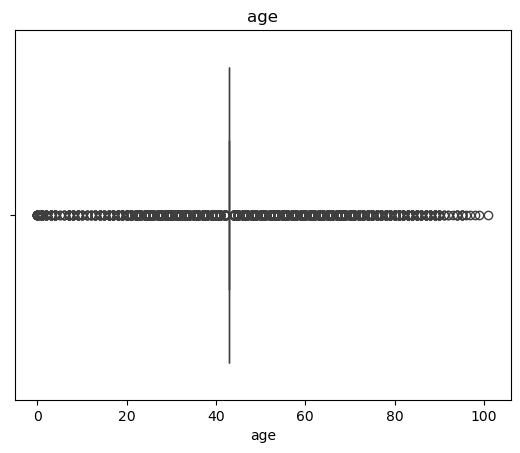

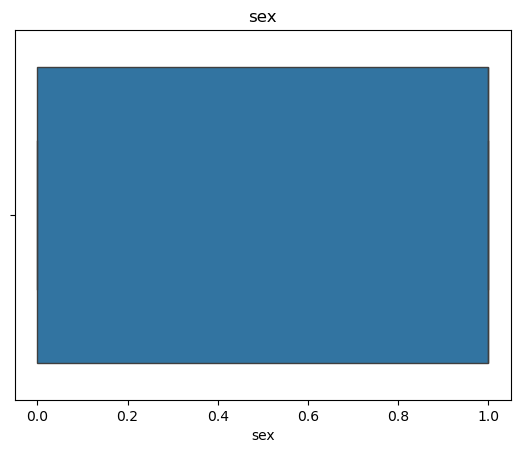

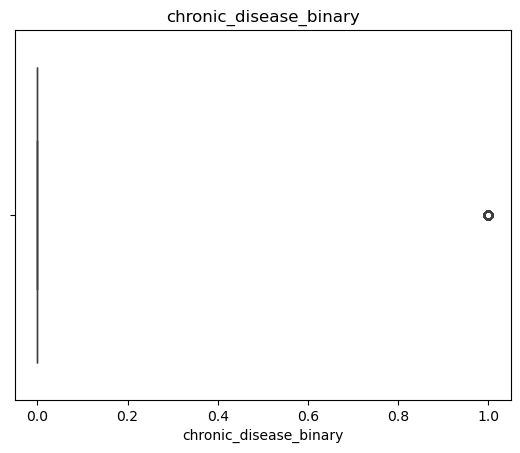

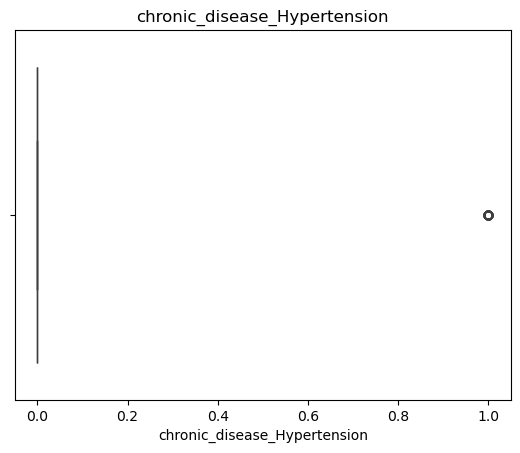

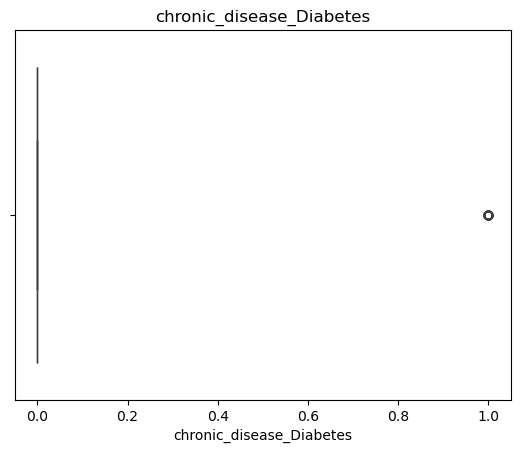

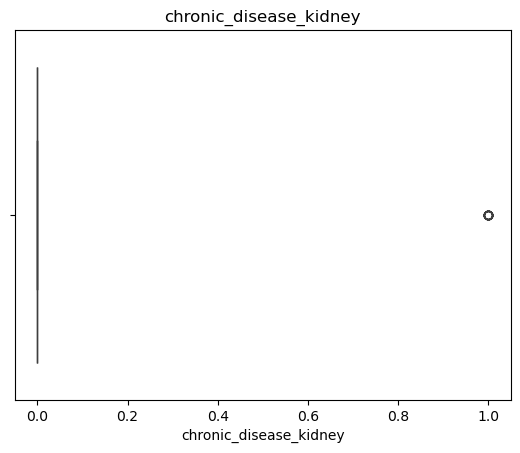

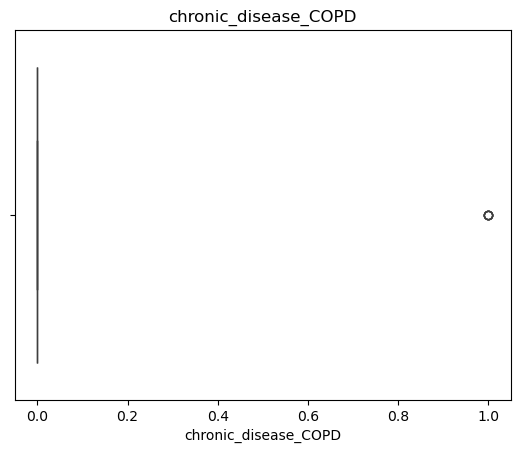

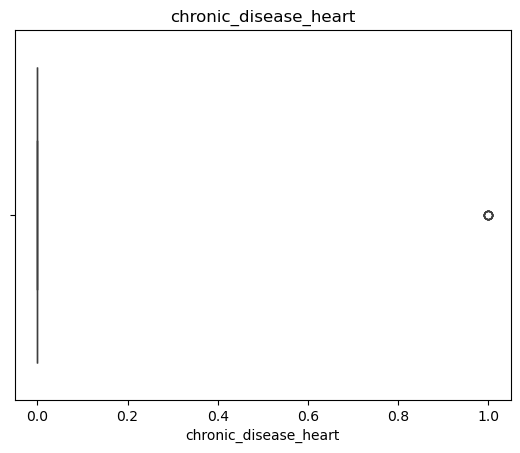

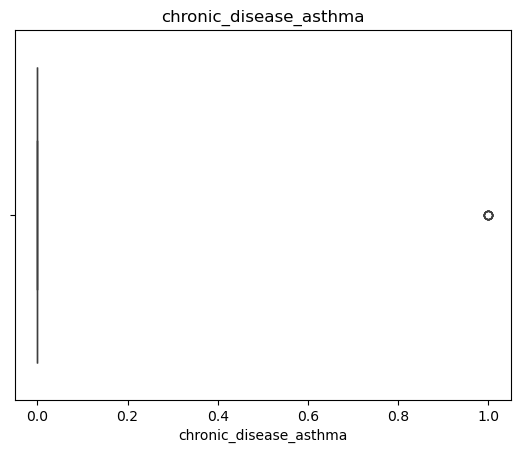

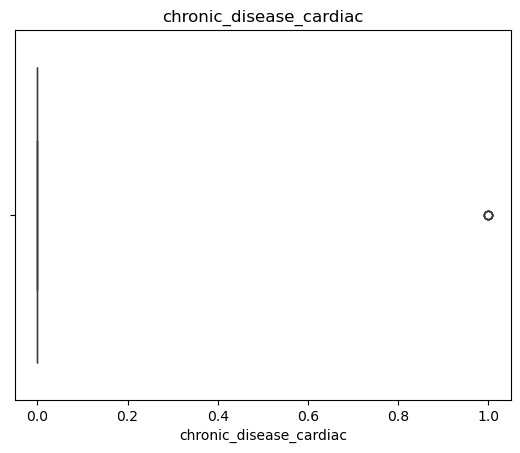

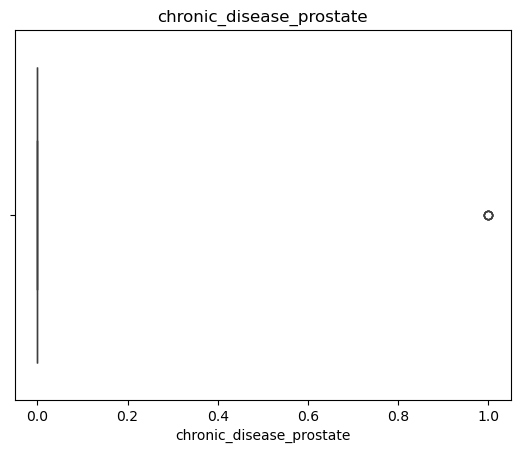

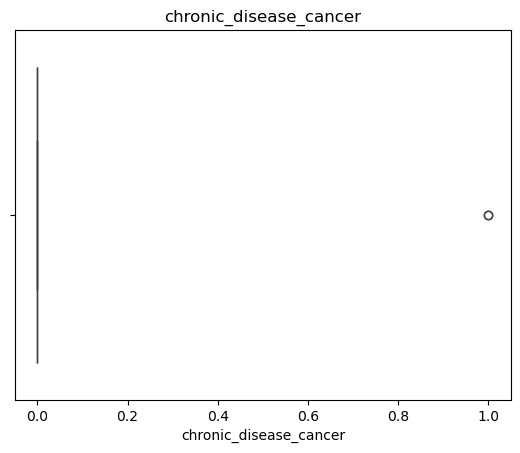

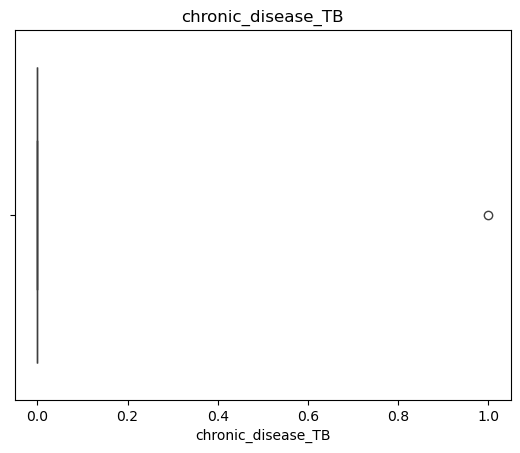

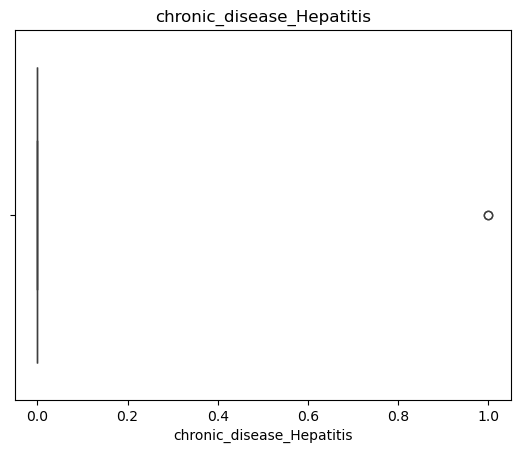

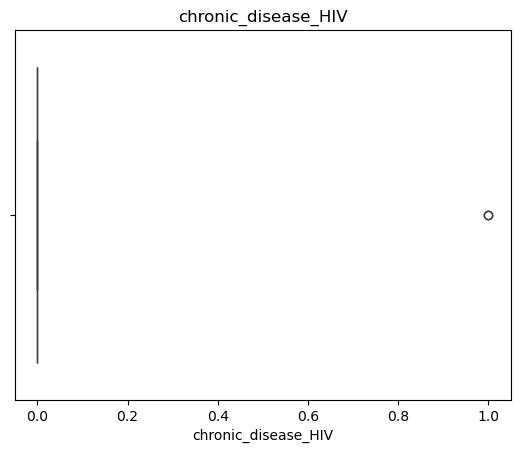

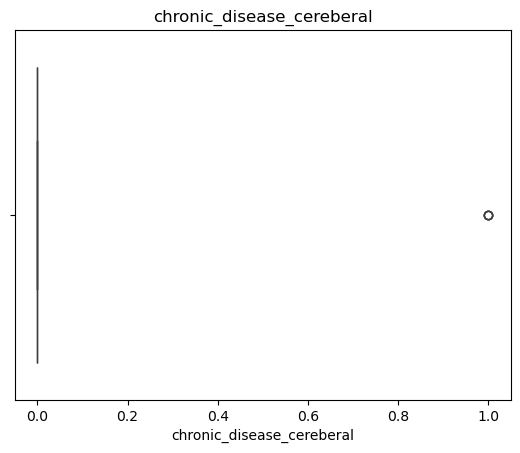

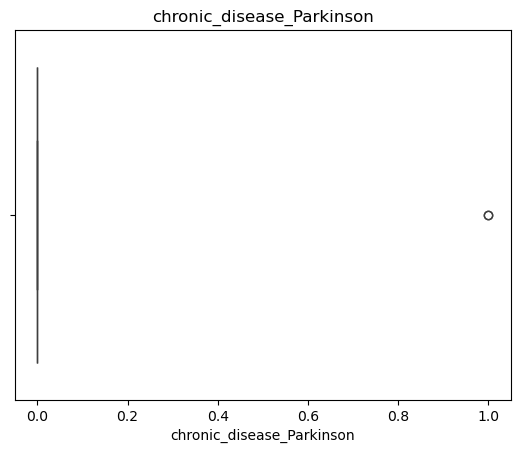

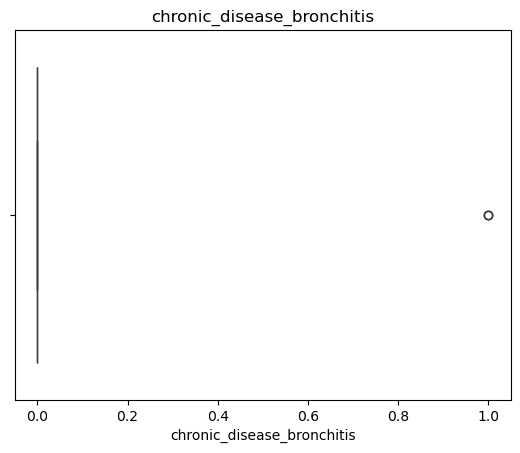

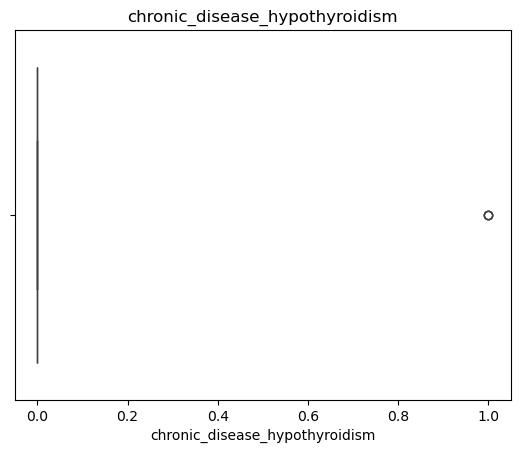

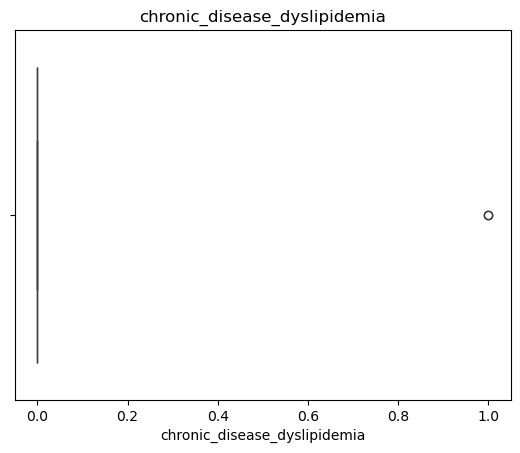

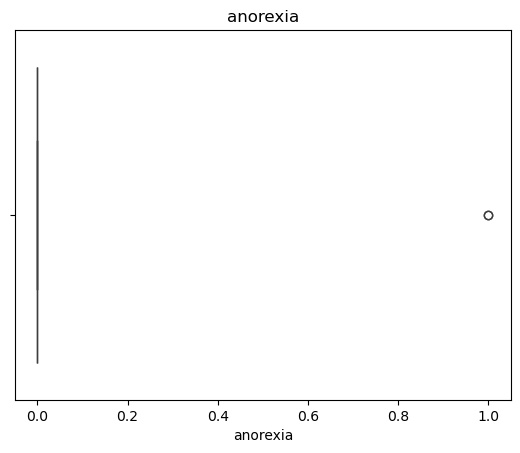

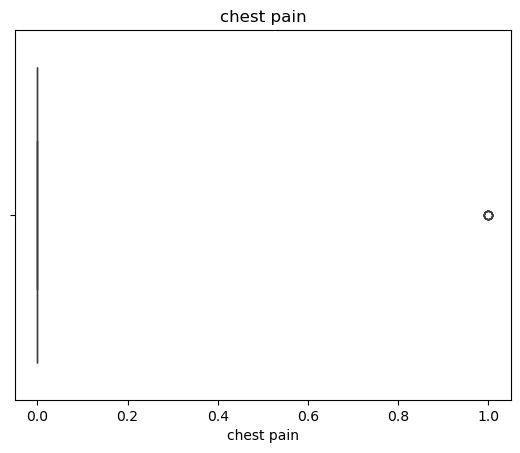

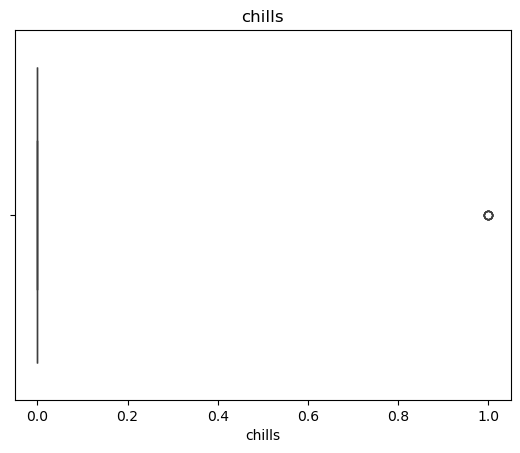

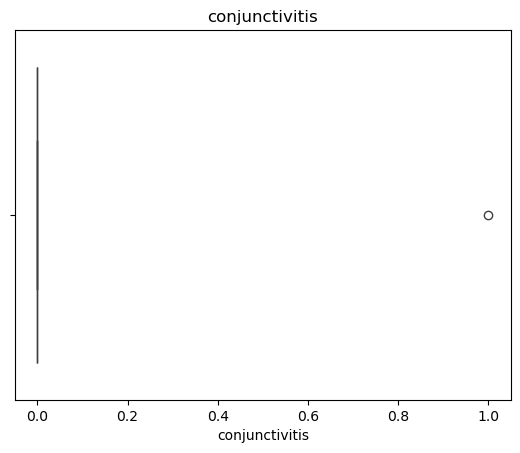

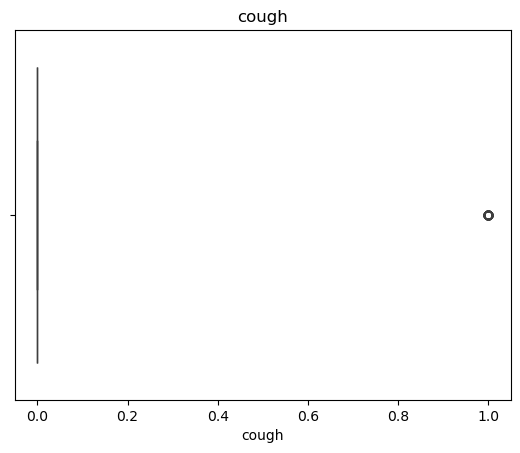

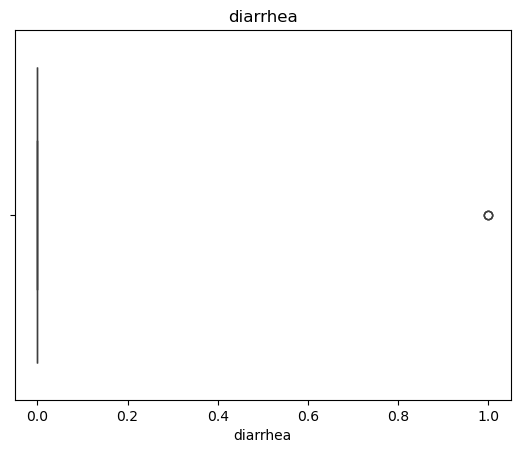

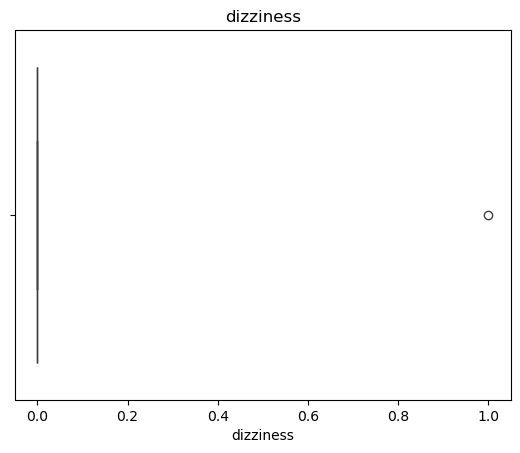

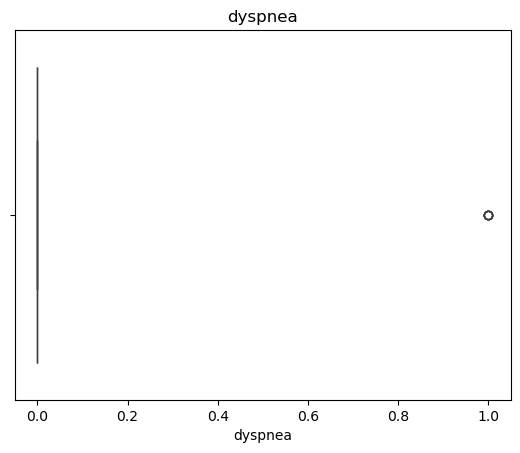

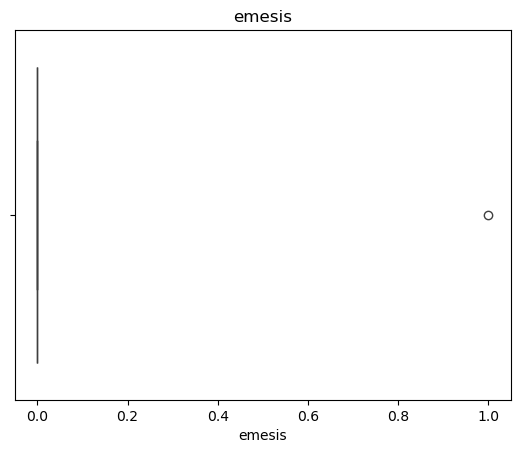

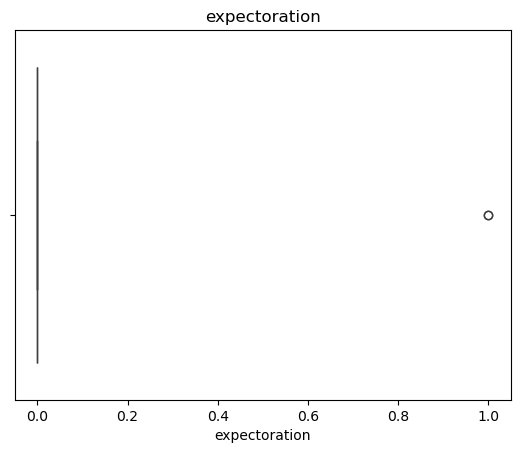

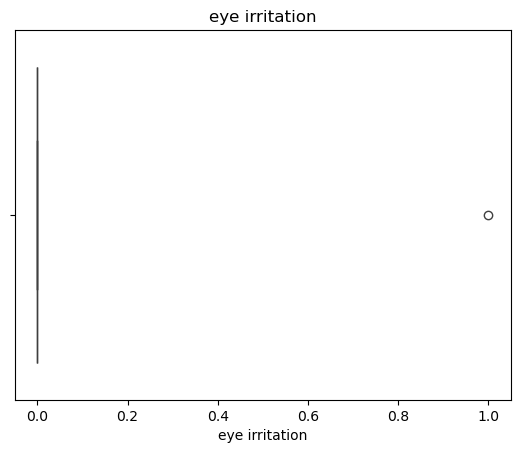

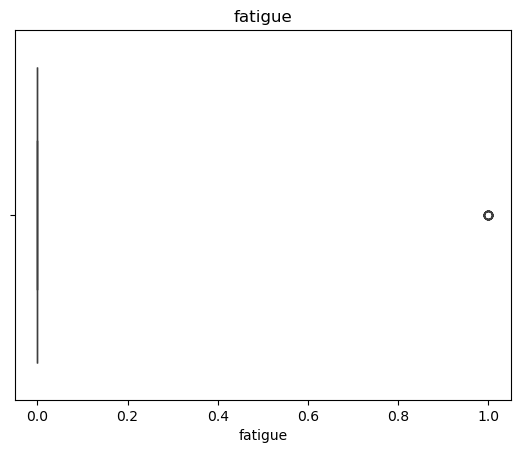

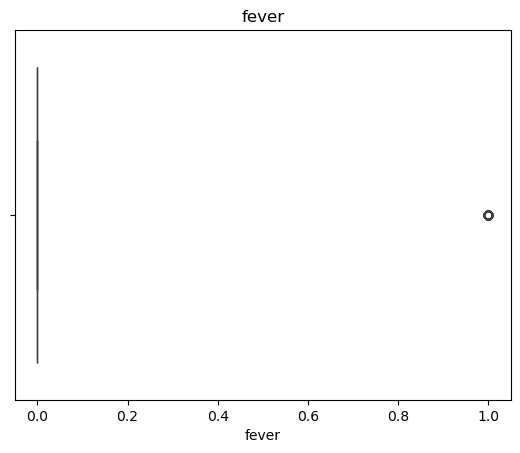

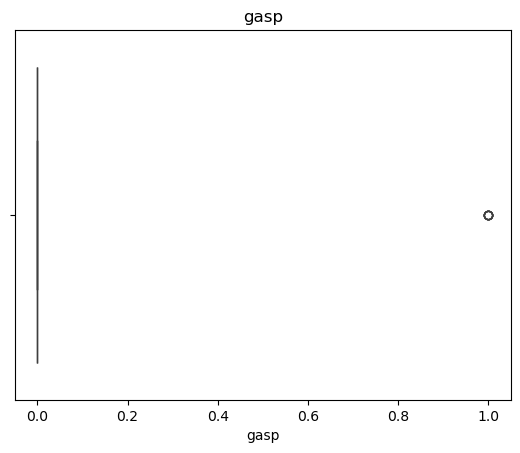

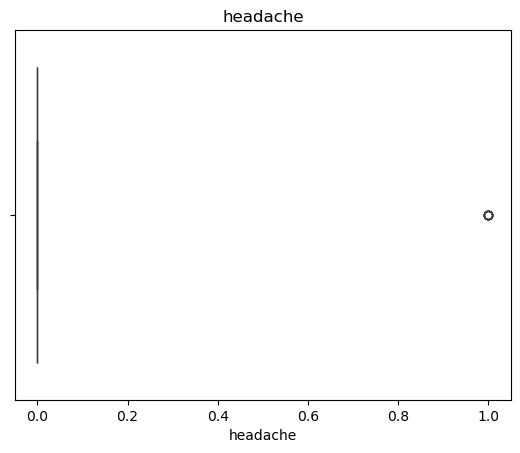

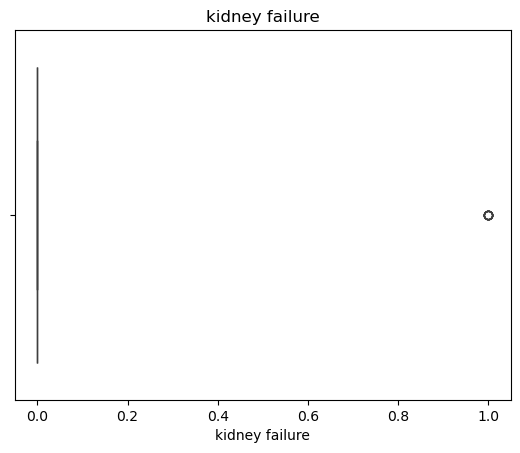

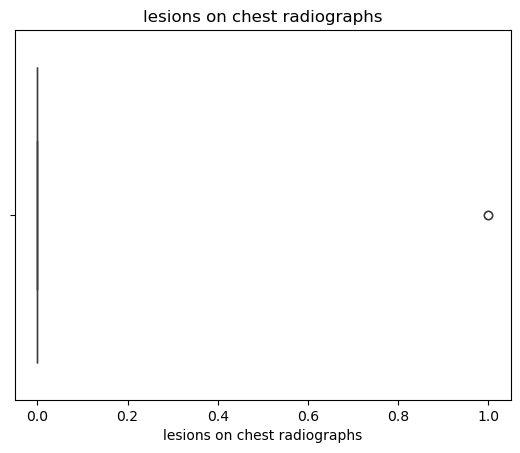

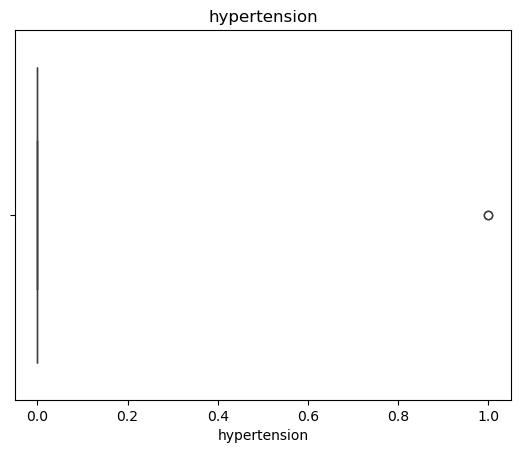

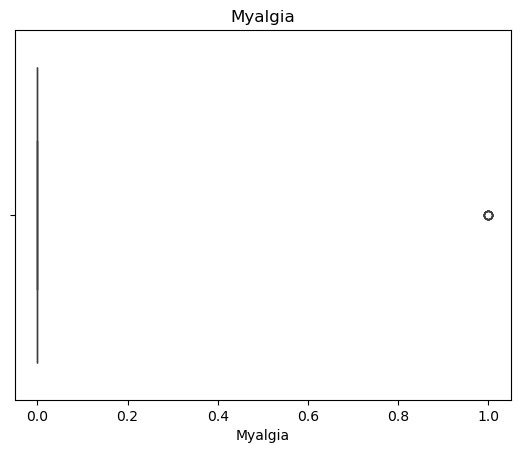

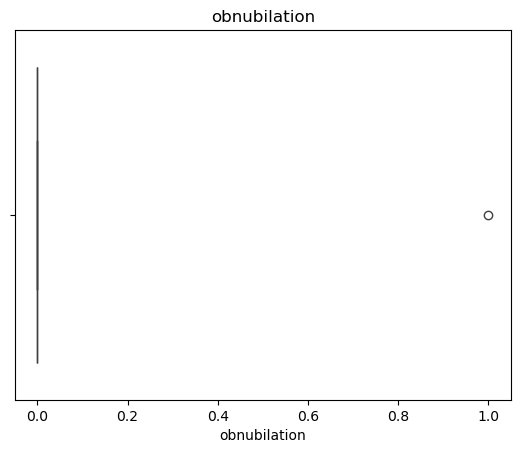

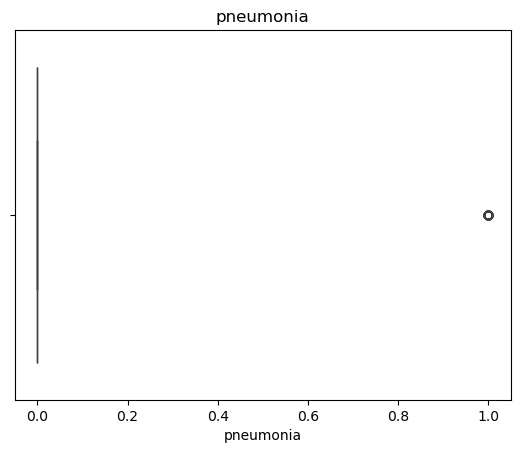

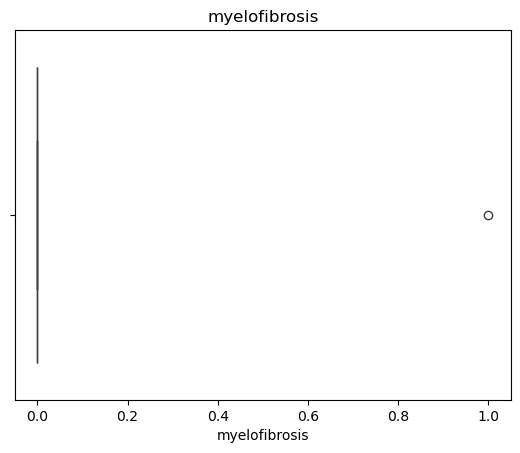

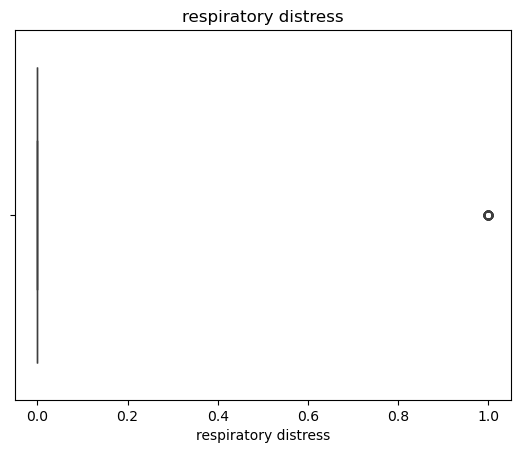

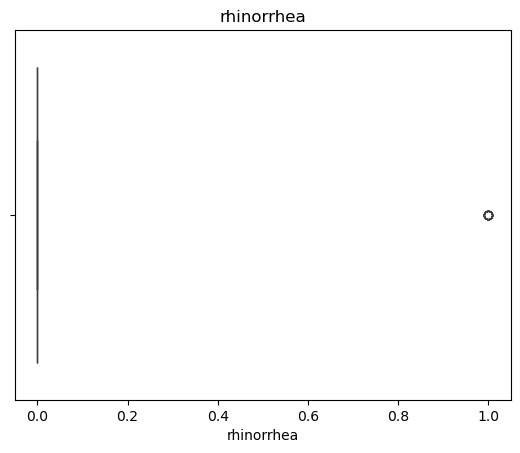

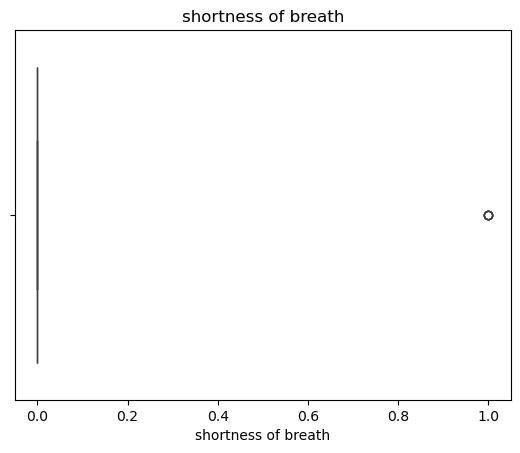

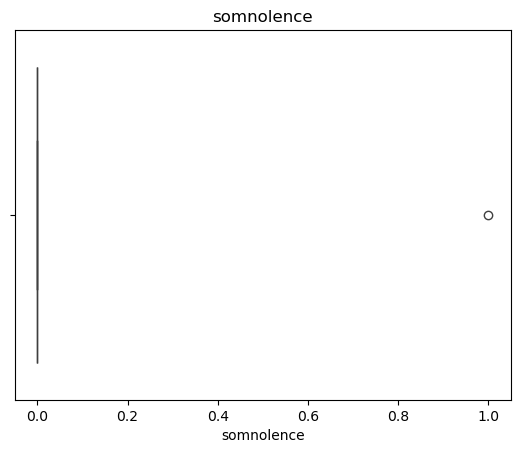

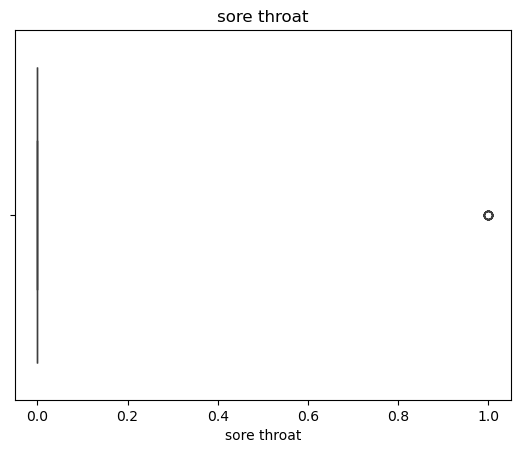

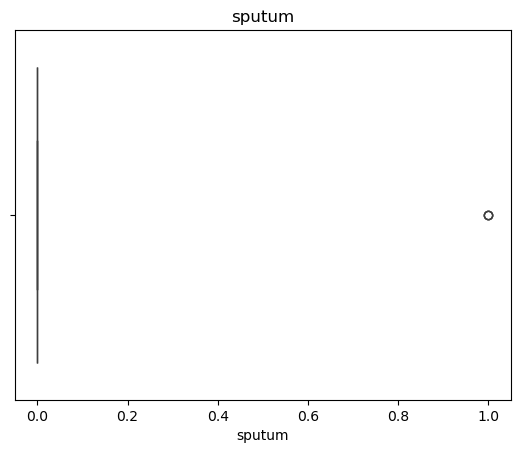

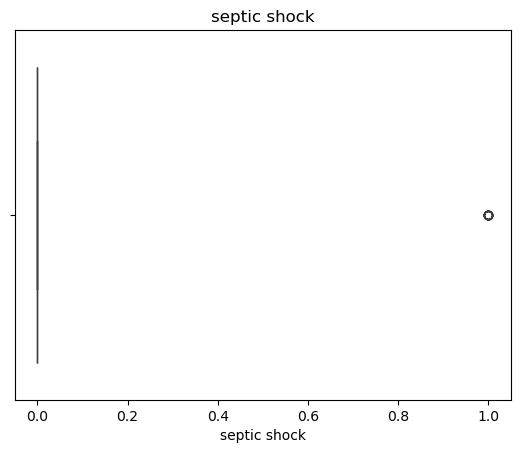

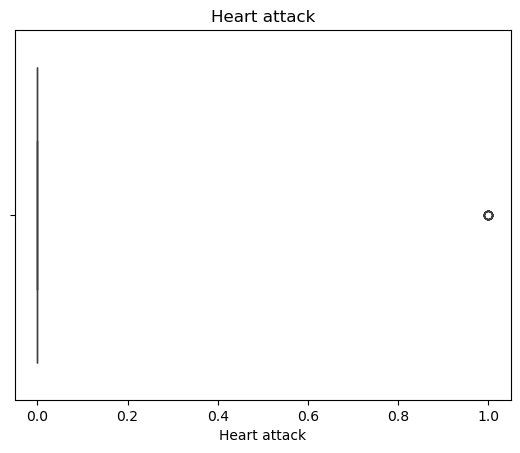

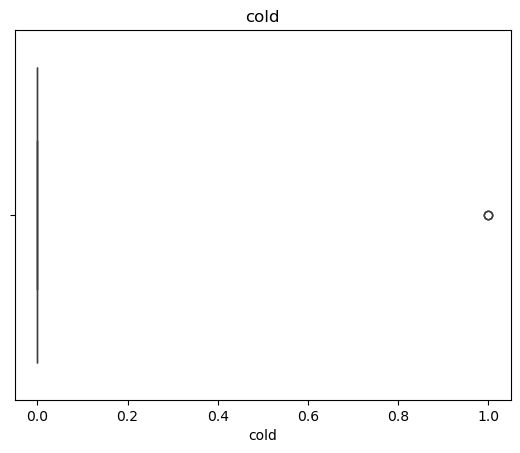

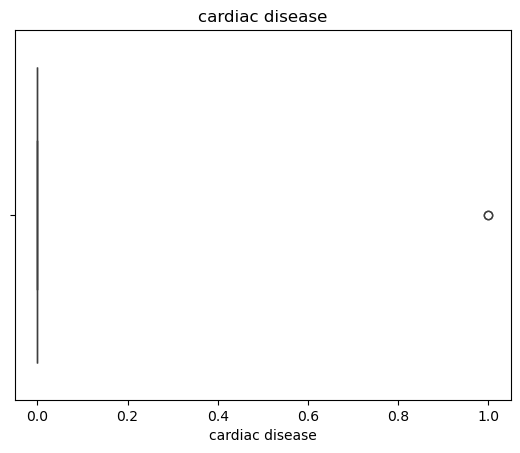

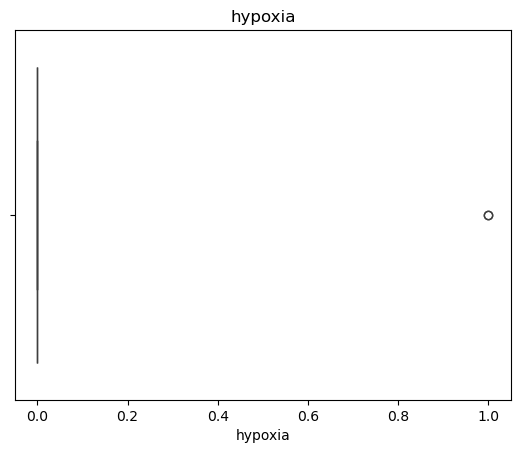

In [11]:
def outliers(x): # x is for dataframes
    y=x.select_dtypes(include=[int,float])
    for i in y:
        sns.boxplot(x=df[i])
        plt.title(i)
        plt.show()
outliers(df)

In [12]:
df['chronic_disease_asthma'].value_counts()

chronic_disease_asthma
0    12013
1        7
Name: count, dtype: int64

In [13]:
# Changing dtype of age column 
df['age']=df['age'].astype(int)

In [14]:
df['age']=np.where(df['age']<10,10,df['age'])
df['age']=np.where(df['age']>90,90,df['age'])

In [15]:
df['age'].value_counts()

age
43    6948
29     150
30     136
32     135
33     123
      ... 
14       8
88       8
15       7
12       4
11       4
Name: count, Length: 81, dtype: int64

In [16]:
df['age'].shape


(12020,)

In [17]:
df['province'].value_counts()

province
Metro Manila    2944
Maharashtra     2009
Gujarat         1888
Tamil Nadu       833
Delhi            498
                ... 
Gorj               1
Bejaia             1
New Mexico         1
Geneva             1
Ilocos Sur         1
Name: count, Length: 175, dtype: int64

# VISUALIZATION 

# 1. Age Distribution : Histogram

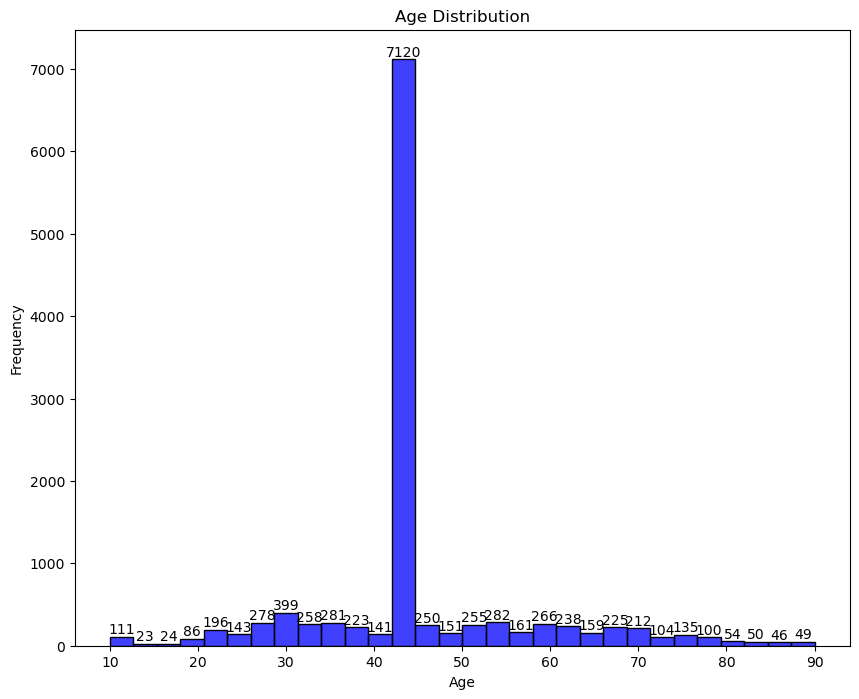

In [20]:
plt.figure(figsize=(10,8))
ax = sns.histplot(df['age'], bins=30, color='blue')
ax.bar_label(ax.containers[0])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 2. Sex Distribution : Pie Chart

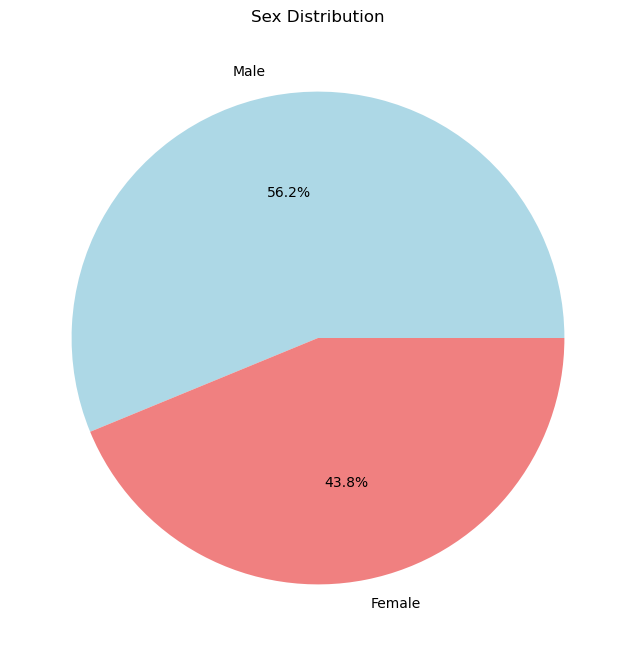

In [22]:
plt.figure(figsize=(8, 8))
plt.pie(df['sex'].value_counts(), labels=['Male','Female'], autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Sex Distribution')
plt.show()

# 3. Outcome Distribution : Bar chart

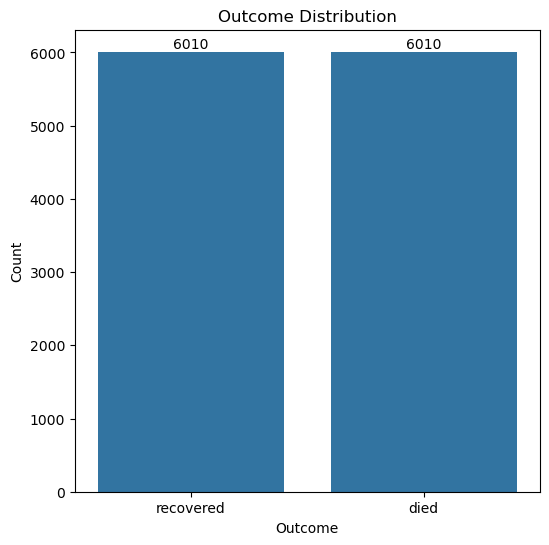

In [24]:
plt.figure(figsize=(6, 6))
outcome_counts = df['outcome'].value_counts()
ax=sns.barplot(x=outcome_counts.index, y=outcome_counts.values)
ax.bar_label(ax.containers[0])
plt.title('Outcome Distribution')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

# 4. Chronic Disease Presence : Pie Chart

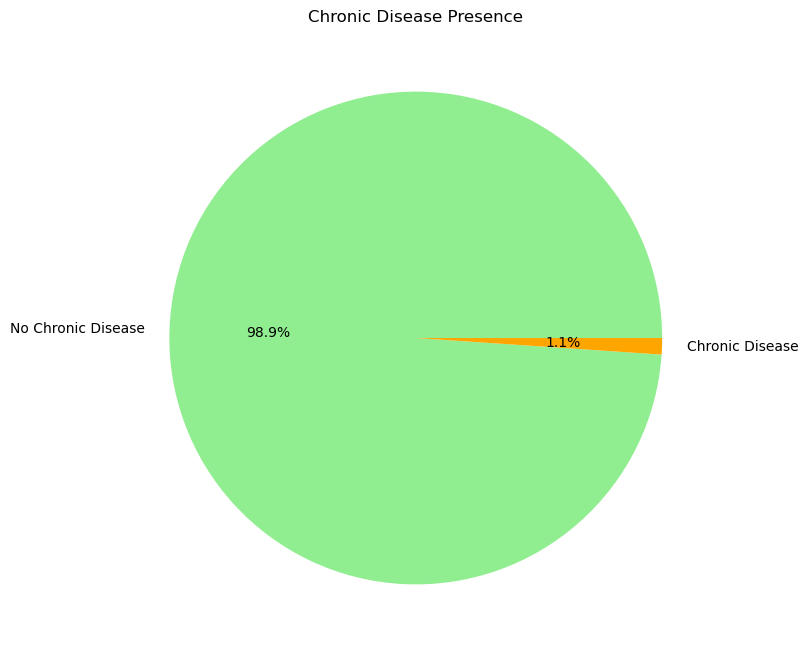

In [26]:
plt.figure(figsize=(8, 8))
chronic_labels = ['No Chronic Disease', 'Chronic Disease']
plt.pie(df['chronic_disease_binary'].value_counts(), labels=chronic_labels, autopct='%1.1f%%', colors=['lightgreen', 'orange'])
plt.title('Chronic Disease Presence')
plt.show()

# 5. Symptoms Correlation : Heatmap

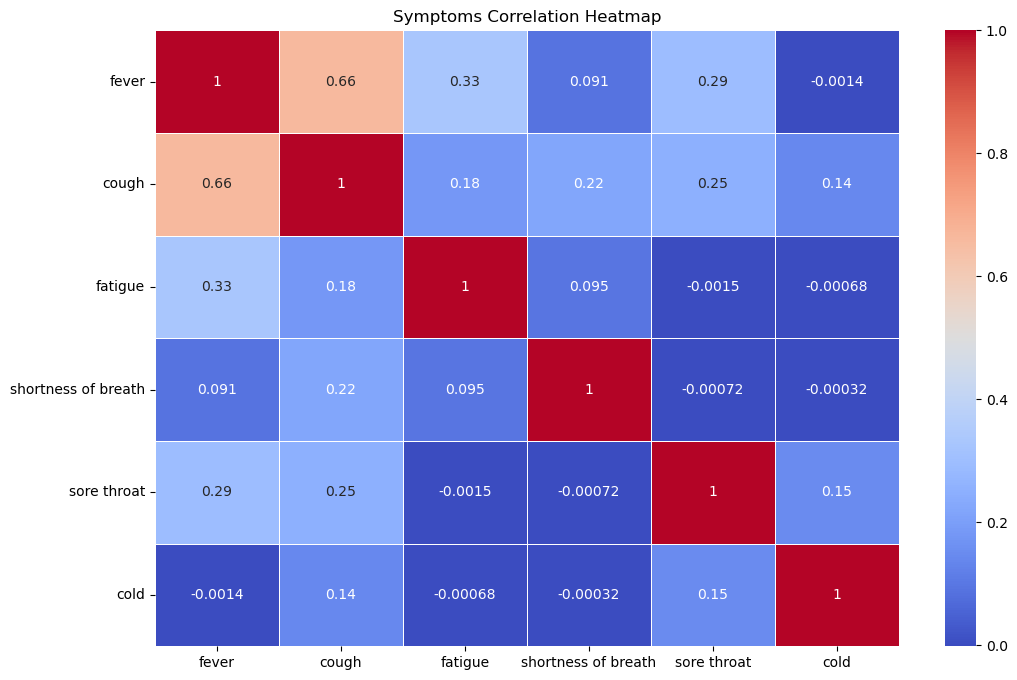

In [28]:
plt.figure(figsize=(12, 8))
symptoms_columns = ['fever', 'cough', 'fatigue', 'shortness of breath', 'sore throat', 'cold']
symptoms_data = df[symptoms_columns]
correlation_matrix = symptoms_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Symptoms Correlation Heatmap')
plt.show()

# 6. Geographical Distribution : Bar chart for countries

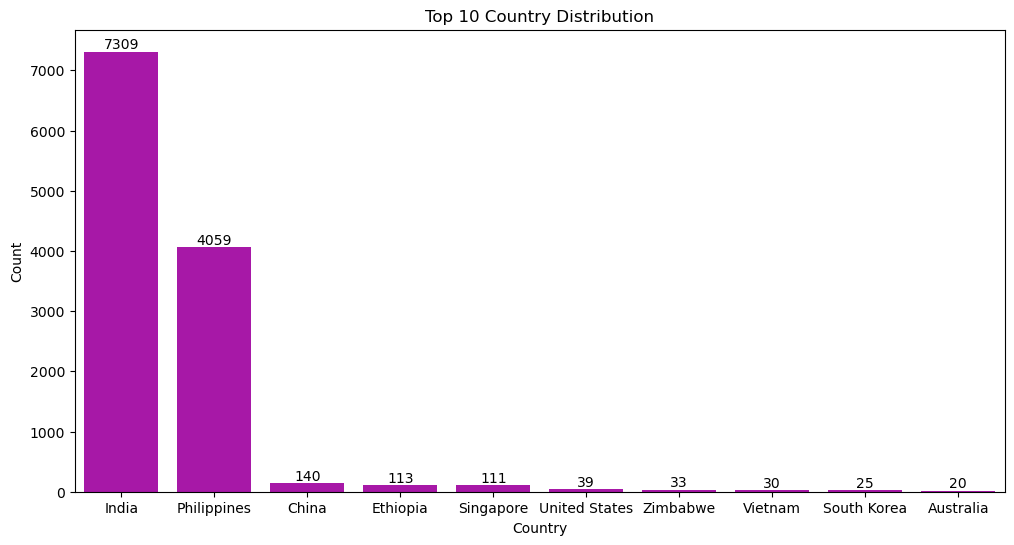

In [30]:
plt.figure(figsize=(12, 6))
country_counts = df['country'].value_counts().head(10)  # Top 10 countries
ax=sns.barplot(x=country_counts.index, y=country_counts.values,color='m')
ax.bar_label(ax.containers[0])
plt.title('Top 10 Country Distribution')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

# 7. Symptoms Analysis : Bar Plot

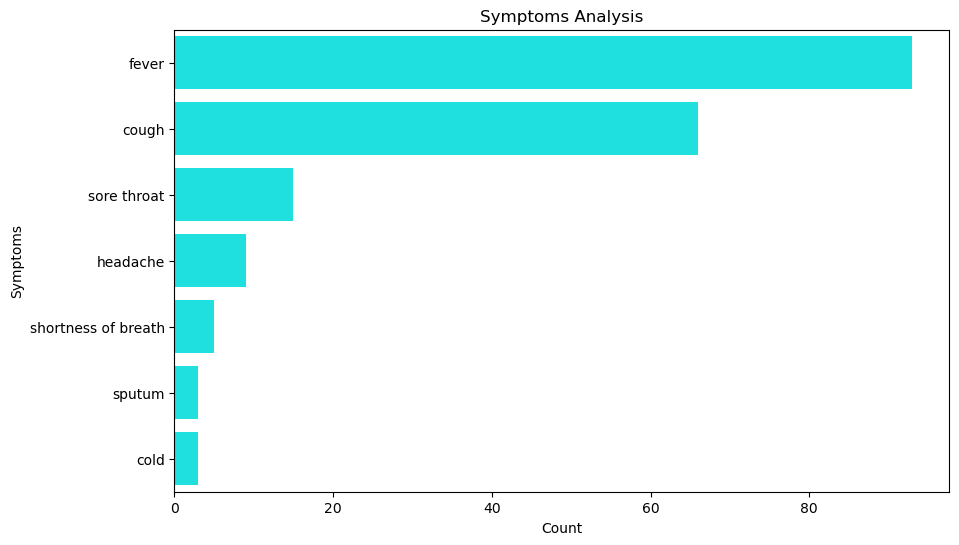

In [32]:
symptoms = ['cough', 'fever', 'headache', 'shortness of breath', 'sore throat', 'sputum', 'cold']
symptoms_data = df[symptoms].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=symptoms_data.values, y=symptoms_data.index,color='cyan')
plt.title('Symptoms Analysis')
plt.xlabel('Count')
plt.ylabel('Symptoms')
plt.show()

# 8. Chronic Disease vs Outcome

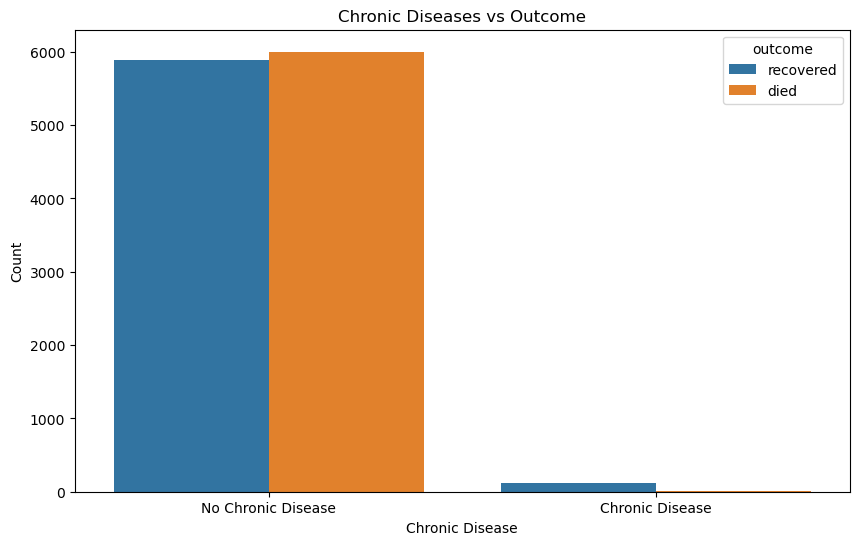

'0 - died\n   1 - recovered'

In [34]:
plt.figure(figsize=(10, 6))
sns.countplot(x='chronic_disease_binary', hue='outcome', data=df)
plt.title('Chronic Diseases vs Outcome')
plt.xlabel('Chronic Disease')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No Chronic Disease', 'Chronic Disease'])
plt.show()

'''0 - died
   1 - recovered'''

# LOGISTIC REGRESSION

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [37]:
df['outcome']=np.where(df['outcome']=='recovered',1,0)

In [38]:
df1=pd.get_dummies(df,columns=['province','country'],drop_first=True)

In [39]:
y=df1['outcome']#Target variable/Dependent variable
x=df1.drop(columns=['outcome'])#Independent variable

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=88)

In [41]:
log=LogisticRegression()

In [42]:
log.fit(x_train,y_train)

LogisticRegression()

In [43]:
print("Trainig accuracy",log.score(x_train,y_train))
print("Test accuracy",log.score(x_test,y_test))

Trainig accuracy 0.8896630615640599
Test accuracy 0.8851913477537438


In [44]:
from sklearn import metrics

In [45]:
print(metrics.classification_report(y_train,log.predict(x_train)))
print("**********************************************************")
print(metrics.classification_report(y_test,log.predict(x_test)))

              precision    recall  f1-score   support

           0       0.94      0.84      0.88      4849
           1       0.85      0.95      0.89      4767

    accuracy                           0.89      9616
   macro avg       0.89      0.89      0.89      9616
weighted avg       0.89      0.89      0.89      9616

**********************************************************
              precision    recall  f1-score   support

           0       0.93      0.82      0.87      1161
           1       0.85      0.95      0.89      1243

    accuracy                           0.89      2404
   macro avg       0.89      0.88      0.88      2404
weighted avg       0.89      0.89      0.88      2404



# DECISION TREE

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
dt=DecisionTreeClassifier(random_state=88)

In [49]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=88)

In [50]:
print("Training Accuracy ",dt.score(x_train,y_train))
print("Test Accuracy ",dt.score(x_test,y_test))

Training Accuracy  0.9261647254575707
Test Accuracy  0.9005823627287853


In [51]:
md=[1,2,3,4,5,6,7,8,9,10]
mss=[10,20,30,40,50,60,70,80]
for i in md:
    for j in mss:
        dt1=DecisionTreeClassifier(max_depth=i,
                              min_samples_split=j,
                              min_samples_leaf=1,
                              random_state=88)
        dt1.fit(x_train,y_train)
        print("max_Depth {} min_sample_split{} ". format(i,j))
        print("accuracy train",dt1.score(x_train,y_train))
        print("Test accuracy",dt1.score(x_test,y_test))
        print("****************************************")
    

max_Depth 1 min_sample_split10 
accuracy train 0.8441139767054908
Test accuracy 0.8252911813643927
****************************************
max_Depth 1 min_sample_split20 
accuracy train 0.8441139767054908
Test accuracy 0.8252911813643927
****************************************
max_Depth 1 min_sample_split30 
accuracy train 0.8441139767054908
Test accuracy 0.8252911813643927
****************************************
max_Depth 1 min_sample_split40 
accuracy train 0.8441139767054908
Test accuracy 0.8252911813643927
****************************************
max_Depth 1 min_sample_split50 
accuracy train 0.8441139767054908
Test accuracy 0.8252911813643927
****************************************
max_Depth 1 min_sample_split60 
accuracy train 0.8441139767054908
Test accuracy 0.8252911813643927
****************************************
max_Depth 1 min_sample_split70 
accuracy train 0.8441139767054908
Test accuracy 0.8252911813643927
****************************************
max_Depth 1 min_samp

In [52]:
dt=DecisionTreeClassifier(max_depth=8,min_samples_leaf=5,
                         min_samples_split=3,
                         random_state=88)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=5, min_samples_split=3,
                       random_state=88)

In [53]:
print("Training Accuracy",dt.score(x_train,y_train))
print("Test Accuracy",dt.score(x_test,y_test))

Training Accuracy 0.9148294509151415
Test Accuracy 0.9064059900166389


# RANDOM FOREST

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
rm=RandomForestClassifier()

In [57]:
rm.fit(x_train,y_train)

RandomForestClassifier()

In [58]:
print("Train accuracy",rm.score(x_train,y_train))
print("Test accuracy",rm.score(x_test,y_test))

Train accuracy 0.9261647254575707
Test accuracy 0.9043261231281198


In [59]:
rm=RandomForestClassifier(n_estimators=200,
                         criterion='gini',
                         max_depth=22,
                         min_samples_split=3,
                         min_samples_leaf=1,
                         random_state=88)

In [60]:
rm.fit(x_train,y_train)

RandomForestClassifier(max_depth=22, min_samples_split=3, n_estimators=200,
                       random_state=88)

In [61]:
print("Train accuracy",rm.score(x_train,y_train))
print("Test accuracy",rm.score(x_test,y_test))

Train accuracy 0.9170133111480865
Test accuracy 0.9018302828618968


# SVM

In [63]:
from sklearn import svm

In [64]:
svm1=svm.SVC()

In [65]:
svm1.fit(x_train,y_train)

SVC()

In [66]:
print("Train accuracy",svm1.score(x_train,y_train))
print("Test accuracy",svm1.score(x_test,y_test))

Train accuracy 0.8616888519134775
Test accuracy 0.8473377703826955


In [67]:
from sklearn.preprocessing import StandardScaler 
#Formula used by standard scaler - (x-mean)/std 

In [68]:
sc=StandardScaler()

In [69]:
sc_fit=sc.fit(x_train)

In [70]:
x_train_sc=sc_fit.transform(x_train)

In [71]:
sc_fit_test=sc.fit(x_test)

In [72]:
x_test_sc=sc_fit_test.transform(x_test)

In [73]:
x_train1=pd.DataFrame(x_train_sc,columns=x_train.columns)

In [74]:
x_test1=pd.DataFrame(x_test_sc,columns=x_test.columns)

In [75]:
#poly , linear , sigmoid , rbf
svm1=svm.SVC(C=1.0,kernel='linear',degree=3)

In [76]:
svm1.fit(x_train1,y_train)

SVC(kernel='linear')

In [77]:
print("Train accuracy",svm1.score(x_train1,y_train))
print("Test Accuracy",svm1.score(x_test1,y_test))

Train accuracy 0.8948627287853578
Test Accuracy 0.8851913477537438
